In [1]:
# 安装所用包
#! pip install statsmodels
#! pip install wooldridge
# https://www.statsmodels.org/stable/api.html#statsmodels-formula-api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from itables import show
from ydata_profiling import ProfileReport

#加载主题包
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

#多行打印设置
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from wooldridge import *

### CEO例子

In [3]:
ceosal = dataWoo('ceosal1')

In [7]:
dataWoo('ceosal1', description=True)

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


In [4]:
ceosal.to_csv('./ceosal.csv')

In [5]:
ceosal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   pcsalary  209 non-null    int64  
 2   sales     209 non-null    float64
 3   roe       209 non-null    float64
 4   pcroe     209 non-null    float64
 5   ros       209 non-null    int64  
 6   indus     209 non-null    int64  
 7   finance   209 non-null    int64  
 8   consprod  209 non-null    int64  
 9   utility   209 non-null    int64  
 10  lsalary   209 non-null    float64
 11  lsales    209 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 19.7 KB


In [4]:
ceosal.describe()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793282,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271088,8.518509,97.219399,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013161
min,223.000000,-61.000000,175.199997,0.500000,-98.900002,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300049,12.400000,-21.200001,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.199951,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.898438,56.299999,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489144


In [5]:
show(ceosal)

Loading ITables v2.5.2 from the internet... (need help?)


In [6]:
profile = ProfileReport(ceosal, title="EDA 报告")
profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████| 12/12 [00:00<00:00, 53.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ceosal.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [15]:
x = ceosal['roe']
y = ceosal['salary']

In [16]:
# 线性拟合，可以返回斜率，截距，r 值，p 值，标准误差
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

print(slope)# 输出斜率
print(intercept) # 输出截距
print(r_value**2) # 输出 r^2

18.50118634521493
963.1913364725577
0.013188624081034111


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0978
Time:                        10:25:39   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.0

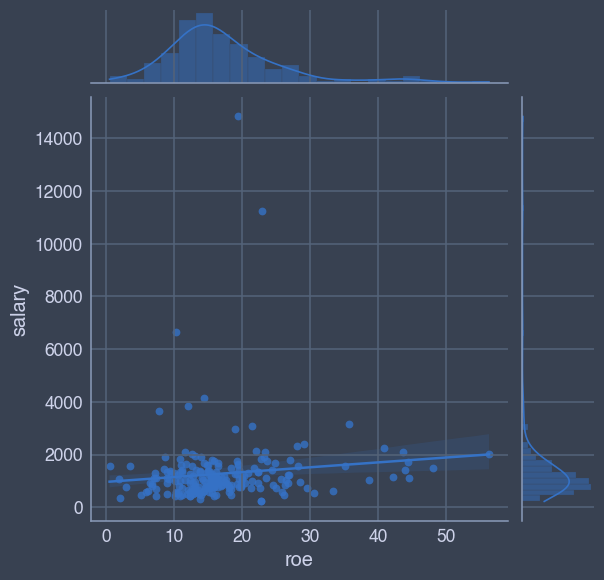

In [17]:
sns.jointplot(x = 'roe',y = 'salary',data = ceosal,kind = 'reg')

x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

### 教育例子

In [24]:
wage1 = dataWoo('wage1')

In [25]:
wage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [26]:
wage1.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [27]:
x = wage1['educ']
y = wage1['wage']

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.78e-22
Time:                        21:42:14   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

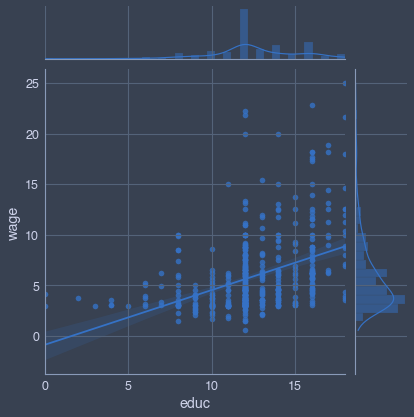

In [32]:
sns.jointplot(x = 'educ',y = 'wage',data = wage1,kind = 'reg')

x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

In [33]:
x = wage1['educ']
y = np.log(wage1['wage'])

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           3.27e-25
Time:                        21:43:08   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5838      0.097      5.998      0.0

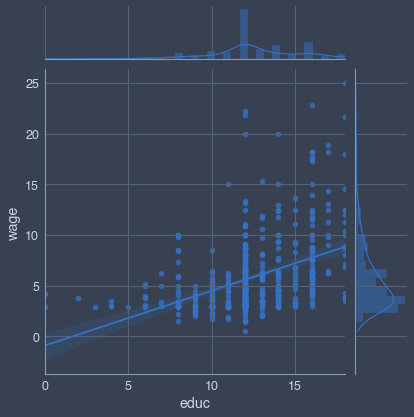

In [35]:
sns.jointplot(x='educ',y = 'wage',data = wage1,kind = 'reg')

x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

### 竞选例子

In [36]:
vote = dataWoo('vote1')

In [37]:
vote.describe()

,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,8.838150,0.554913,50.502890,310.611005,305.088537,49.757225,5.025556,4.944369,51.076545
std,8.768823,0.498418,16.784761,280.985381,306.278339,9.983650,1.601602,1.571143,33.483575
min,1.000000,0.000000,16.000000,0.302000,0.930000,22.000000,-1.197328,-0.072571,0.094635
25%,3.000000,0.000000,36.000000,81.634003,60.054001,44.000000,4.402246,4.095244,18.867996
50%,6.000000,1.000000,50.000000,242.781998,221.529999,50.000000,5.492164,5.400558,50.849903
75%,11.000000,1.000000,65.000000,457.410004,450.716003,56.000000,6.125580,6.110837,84.255096
max,42.000000,1.000000,84.000000,1470.673950,1548.192993,71.000000,7.293476,7.344844,99.495003


In [38]:
x = vote['shareA']
y = vote['voteA']

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           6.63e-74
Time:                        21:43:47   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8122      0.887     30.221      0.0

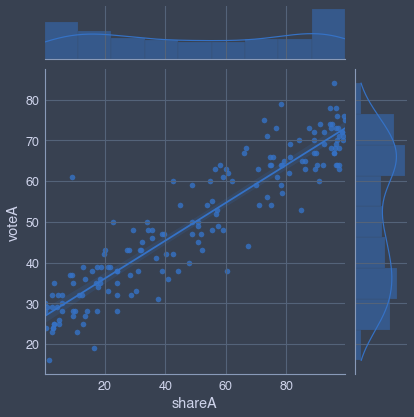

In [39]:
sns.jointplot(x='shareA',y = 'voteA',data = vote,kind = 'reg')

x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

### 学生例子

In [40]:
meap93 = dataWoo('meap93')

In [43]:
meap93.describe()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,25.201471,2663.806373,100.641667,4376.578431,31774.507353,6463.428922,5.066422,83.651716,24.106863,49.183088,38237.936275,10.539960,8.370177,7.509714,4.603369,0.204503,10.354385
std,13.610075,2696.820560,13.299518,775.789717,5038.303826,1456.337659,5.485072,13.368375,10.493613,12.524668,5985.086038,0.151267,0.161882,0.867304,0.126683,0.037533,0.154316
min,1.400000,212.000000,65.900002,3332.000000,19764.000000,0.000000,0.000000,23.500000,1.900000,7.200000,24498.000000,10.106347,8.111328,5.356586,4.188138,0.000000,9.891618
25%,14.625000,1037.500000,91.450001,3821.250000,28185.500000,5536.500000,1.900000,77.000000,16.625000,41.299999,34032.000000,10.435057,8.248333,6.944566,4.515792,0.187977,10.246563
50%,23.849999,1840.500000,99.000000,4145.000000,31266.000000,6304.500000,3.700000,86.300003,23.400000,49.100000,37443.500000,10.530588,8.329658,7.517791,4.595120,0.202401,10.350286
75%,33.825000,3084.750000,108.025000,4658.750000,34499.750000,7228.000000,6.500000,93.224998,30.050000,57.149999,41637.000000,10.636744,8.446502,8.034225,4.682363,0.220256,10.448707
max,79.500000,16793.000000,166.600006,7419.000000,52812.000000,11618.000000,61.900002,127.099998,66.699997,85.699997,63518.000000,11.059078,8.911799,9.728718,5.115596,0.449985,10.874494


In [46]:
meap93.head().T

,0,1,2,3,4
lnchprg,1.400000,2.300000,2.700000,3.400000,3.400000
enroll,1862.000000,11355.000000,7685.000000,1148.000000,1572.000000
staff,112.599998,101.199997,114.000000,85.400002,96.099998
expend,5765.000000,6601.000000,6834.000000,3586.000000,3847.000000
salary,37498.000000,48722.000000,44541.000000,31566.000000,29781.000000
benefits,7420.000000,10370.000000,7313.000000,5989.000000,5545.000000
droprate,2.900000,1.300000,3.500000,3.600000,0.000000
gradrate,89.199997,91.400002,91.400002,86.599998,100.000000
math10,56.400002,42.700001,43.799999,25.299999,15.300000
sci11,67.900002,65.300003,54.299999,60.000000,65.800003


In [50]:
x = meap93['lnchprg']
y = meap93['math10']

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.75e-18
Time:                        09:32:43   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1427      0.998     32.221      0.0

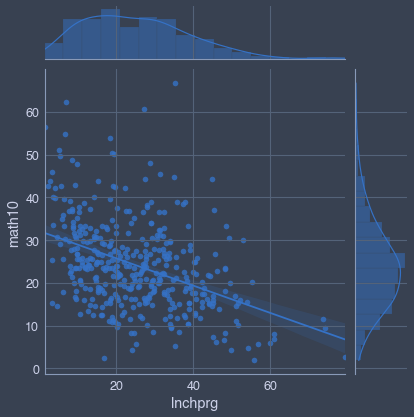

In [51]:
sns.jointplot(x='lnchprg',y = 'math10',data = meap93,kind = 'reg')

x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果